In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, OneClassSVM
import time
import sys
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('../datas/iris.data', header=None)
X = data.iloc[:, :2]
Y = data.iloc[:, -1]
###labelencoder
Y = Y.replace('Iris-setosa', 0)
Y = Y.replace('Iris-versicolor', 1)
Y = Y.replace('Iris-virginica', 2)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=10)

In [13]:
# print(xtrain)
rbf = SVC(kernel='rbf', C=1.0, gamma=0.1)
linears = SVC(kernel='linear', C=0.1)
polys = SVC(kernel='poly', gamma=0.1, coef0=0.5, degree=4, C=1.0)
sigmoids = SVC(kernel='sigmoid', gamma=0.001, coef0=0.5, C=100.0, decision_function_shape='ovr')

运行所需时间： [0.002979278564453125, 0.002026796340942383, 0.001992940902709961, 0.0009958744049072266]
训练集分数： [0.819047619047619, 0.819047619047619, 0.8095238095238095, 0.8285714285714286]
测试集分数： [0.8222222222222222, 0.8222222222222222, 0.8222222222222222, 0.8]


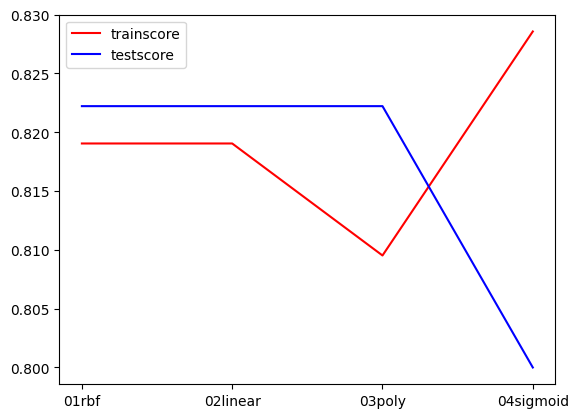

In [14]:
# model.append([rbf,linears,polys,sigmoids,precomputeds])
# print(model)
models = np.array([rbf, linears, polys, sigmoids])
# sys.exit(0)
times = []
train_scores = []
test_scores = []

for model in models:
    state = time.time()
    model.fit(xtrain, ytrain)
    end = time.time()
    train_score = model.score(xtrain, ytrain)
    test_score = model.score(xtest, ytest)
    times.append(end - state)
    train_scores.append(train_score)
    test_scores.append(test_score)

print('运行所需时间：', times)
print('训练集分数：', train_scores)
print('测试集分数：', test_scores)

plt.figure(num=1)
plt.plot(['01rbf', '02linear', '03poly', '04sigmoid'], train_scores, 'r', label='trainscore')
plt.plot(['01rbf', '02linear', '03poly', '04sigmoid'], test_scores, 'b', label='testscore')
plt.legend()
# plt.figure(num=2)
# plt.plot(['01rbf', '02linear', '03poly', '04sigmoid'], times, 'g', label='time')
# plt.legend()
plt.show()